# Data Analysis Example 1


## Origin of regression analysis

Regression analysis started from Francis Galton, who is a cousin of Charles Darwin, who studied evolution. He was a pioneer of eugenics, and also coined the phrase "nature versus nurture". While his works have been controvertial, he was the person who created the statistical concept of correlation and was one of the first people who used regression analysis to make conclusions based on data. Here, we will use the raw data that Galton used in his research.

<img src='Image/galton.jpg' width=250>

Motivated by the work of his cousin, Charles Darwin, the English scientist Francis Galton studied the degree to which human traits were passed from one generation to the next. In an 1885 study, he measured the heights of 933 adult childrem amd their parents. Galton multiplied all female heights by 1.08 to convert them to a male-equivalent height. He estimated the simple linear regression line of child's height on average parent's height and, upon finding that the slope was positive but less than 1, concluded that children of taller-than-average parents tended to also be taller than average but not as tall as their parents; and similarly, children of shorter-than-average parents tended to be shorter than average, but not as short as their parents. He labeled this "regression towards mediocrity" because of the apparent regression (i.e., reversion) of children's height toward the average. Other scientists began to refer to the line as "Galton's regression line".

Here, we will reproduce Galton's findings

(These are the raw data used in the paper by F. Galton, "Regression towards Mediocrity in Hereditary Sature" in the Journal of the Anthropological Institute in 1886)

Example taken from "The Statistical Sleuth"

### Steps that Galton took:

1. Multiply female's height by 1.08 to get male equivalent height
2. Get the average parent's male equivalent height
3. Regression analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/galton.csv')
df

,Gender,Family,Height,Father,Mother
0,male,1,73.2,78.5,67.0
1,female,1,69.2,78.5,67.0
2,female,1,69.0,78.5,67.0
3,female,1,69.0,78.5,67.0
4,male,2,73.5,75.5,66.5
...,...,...,...,...,...
928,male,205,68.5,68.5,65.0
929,male,205,67.7,68.5,65.0
930,female,205,64.0,68.5,65.0
931,female,205,63.5,68.5,65.0


In [3]:
df['parent1'] = 1.08 * df['Mother']

In [4]:
df['Parent'] = (df['Father'] + df['parent1']) / 2

In [5]:
df

,Gender,Family,Height,Father,Mother,parent1,Parent
0,male,1,73.2,78.5,67.0,72.36,75.43
1,female,1,69.2,78.5,67.0,72.36,75.43
2,female,1,69.0,78.5,67.0,72.36,75.43
3,female,1,69.0,78.5,67.0,72.36,75.43
4,male,2,73.5,75.5,66.5,71.82,73.66
...,...,...,...,...,...,...,...
928,male,205,68.5,68.5,65.0,70.20,69.35
929,male,205,67.7,68.5,65.0,70.20,69.35
930,female,205,64.0,68.5,65.0,70.20,69.35
931,female,205,63.5,68.5,65.0,70.20,69.35


How can we only multiply female's height by 1.08?

This might not be the best option, but I would do it like this:

1. Create male_df and female_df
2. Multiply female_df's height
3. Merge male_df and female_df

In [7]:
male_df = df[df['Gender']=='male']
female_df = df[df['Gender']=='female']

male_df

,Gender,Family,Height,Father,Mother,parent1,Parent
0,male,1,73.2,78.5,67.0,72.36,75.43
4,male,2,73.5,75.5,66.5,71.82,73.66
5,male,2,72.5,75.5,66.5,71.82,73.66
8,male,3,71.0,75.0,64.0,69.12,72.06
10,male,4,70.5,75.0,64.0,69.12,72.06
...,...,...,...,...,...,...,...
925,male,205,72.0,68.5,65.0,70.20,69.35
926,male,205,70.5,68.5,65.0,70.20,69.35
927,male,205,68.7,68.5,65.0,70.20,69.35
928,male,205,68.5,68.5,65.0,70.20,69.35


In [8]:
male_df['Final height'] = male_df['Height']
female_df['Final height'] = female_df['Height'] * 1.08

C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


New code:
```Python
pd.concat([df1, df2])
```
can merge df1 and df2

In [9]:
df_final = pd.concat([male_df, female_df])

In [10]:
df_final

,Gender,Family,Height,Father,Mother,parent1,Parent,Final height
0,male,1,73.2,78.5,67.0,72.36,75.43,73.20
4,male,2,73.5,75.5,66.5,71.82,73.66,73.50
5,male,2,72.5,75.5,66.5,71.82,73.66,72.50
8,male,3,71.0,75.0,64.0,69.12,72.06,71.00
10,male,4,70.5,75.0,64.0,69.12,72.06,70.50
...,...,...,...,...,...,...,...,...
922,female,203,61.0,62.0,66.0,71.28,66.64,65.88
924,female,204,57.0,62.5,63.0,68.04,65.27,61.56
930,female,205,64.0,68.5,65.0,70.20,69.35,69.12
931,female,205,63.5,68.5,65.0,70.20,69.35,68.58


Now, we will create a scatter plot:

Remember this code:

```Python
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(x, y, c='blue', edgecolors='none', s=30)
plt.title("Title", fontsize=20)
axs.set_xlabel("x-label", fontsize=18)
axs.set_ylabel("y-label", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()
```

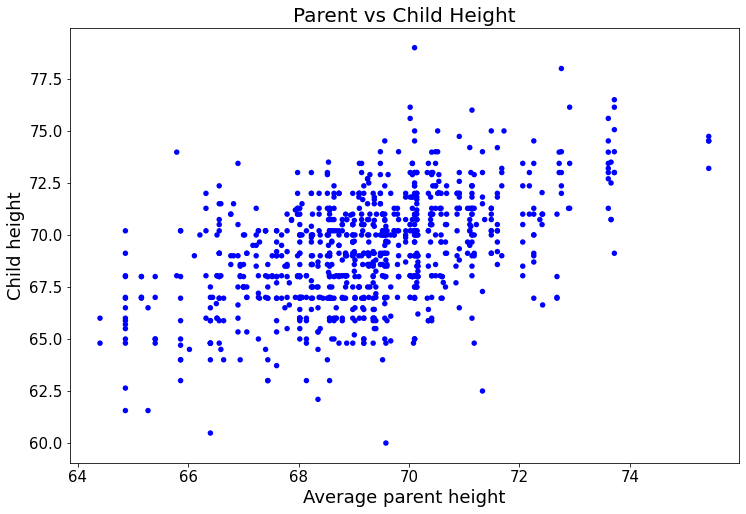

In [12]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df_final['Parent'], df_final['Final height'], c='blue', edgecolors='none', s=30)
plt.title("Parent vs Child Height", fontsize=20)
axs.set_xlabel("Average parent height", fontsize=18)
axs.set_ylabel("Child height", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

It looks like there is a positive correlation between the two variables. Before doing a regression analysis, let's do a correlation analysis:

```Python
from scipy import stats
corr = stats.pearsonr(x, y)
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])
```

In [13]:
from scipy import stats
corr = stats.pearsonr(df_final['Parent'], df_final['Final height'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: 0.4978060101114854
p-value: 1.4097513013846992e-59


Let's do a regression analysis now:

In [14]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = df_final['Parent'].values
y_vals = df_final['Final height']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Final height   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     306.7
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.41e-59
Time:                        07:22:42   Log-Likelihood:                -2076.8
No. Observations:                 933   AIC:                             4158.
Df Residuals:                     931   BIC:                             4167.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8261      2.822      7.025      0.000      14.288      25.364
x1             0.7139      0.041     17.513      0.000       0.634       0.794
==============================================================================
Omnibus:                        8.346   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               10.244
Skew:                          -0.118   Prob(JB):                      0.00597
Kurtosis:                       3.456   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#That the slope in this prediction equation is between 0 and 1 implies that
#children of shorterthan-average parents are expected to be taller than them, and children of taller-than-average
#parents are expected to be shorter than them.